<a href="https://colab.research.google.com/github/anumit-web/ML-Analytics-Portfolio-2024-DEV-ENV/blob/main/9.%20Data%20Cleaning%20and%20Preprocessing/Data_Cleaning_and_Preprocessing_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Intelligence
# Machine Learning
# Portfolio Project
# #9
# Data Cleaning (v3)
# Goal = Cleaning and preprocessing raw dataset. showcase of skills like data wrangling, feature engineering, data normalization


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


# Branding statement

In [1]:
# https://i.ibb.co/zZswY34/Pink-hands-network-2.png

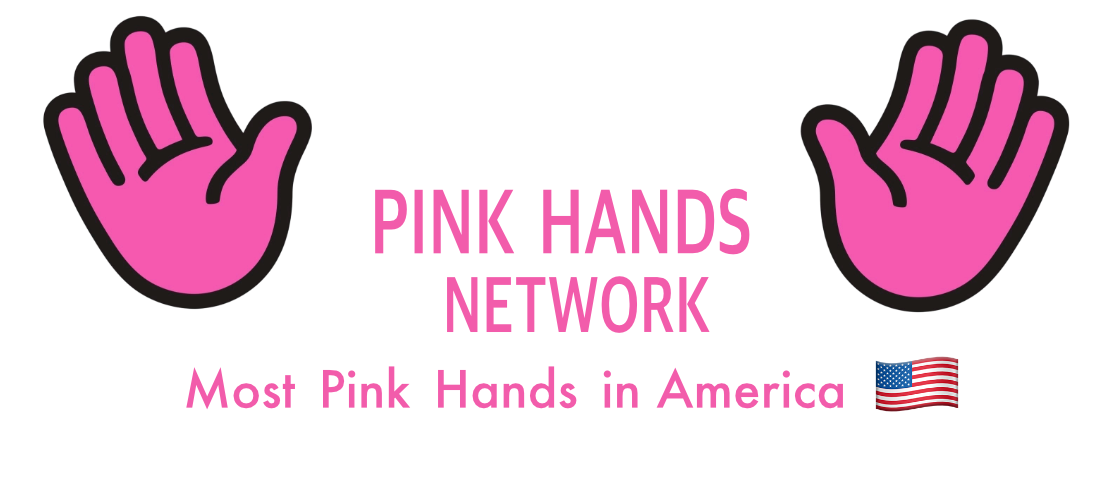

In [2]:
from IPython.display import Image
Image('https://i.ibb.co/zZswY34/Pink-hands-network-2.png')

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# EDA, Exploratory Data Analysis

## import libraries

In [3]:
print('Hello, Data Cleaning and Preprocessing')

Hello, Data Cleaning and Preprocessing


In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# this library is used for one hot encoding
from sklearn.preprocessing import OneHotEncoder

In [6]:
from sklearn.preprocessing import LabelEncoder

## Input data

In [7]:
# https://zenodo.org/records/13925131/files/netflix_titles.csv?download=1

input_data_df = pd.read_csv("https://zenodo.org/records/13925131/files/netflix_titles.csv"
                            , sep = ',')

In [8]:
number_of_rows = input_data_df.shape[0]
number_of_columns = input_data_df.shape[1]
print("Numner of rows = ", number_of_rows)
print("Number of columns = ", number_of_columns)

Numner of rows =  8807
Number of columns =  12


In [9]:

input_data_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
input_data_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [11]:
input_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
input_data_df.describe()


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [13]:
# raise SystemExit("Stop right there!")

## find list of all columns which have null values

using SKIMPY

In [14]:
# Get the count of null values in each column
null_counts = input_data_df.isnull().sum()
print('Priniting count of null values = ')
print(null_counts)

Priniting count of null values = 
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [15]:
try:
  import skimpy
except:
  !pip install skimpy
  import skimpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: polars
    Found existing installation: polars 1.7.1
    Uninstalling polars-1.7.1:
      Successfully uninstalled polars-1.7.1
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.


In [16]:
from skimpy import skim

In [17]:
skim(input_data_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8807   │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 12     │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %   ┃ mean   ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ release_year      │    0 │      0 │   2014 │   8.819 │   1925 │   2013 │   2017 │   2019 │  2021 │     ▁▇  │  │
│ └───────────────────┴──────┴────────┴────────┴─────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA         ┃ NA %         ┃ words per row              ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ show_id                  │          0 │            0 │                          1 │                   8807 │  │
│ │ type                     │          0 │            0 │                        1.3 │                  11483 │  │
│ │ title                    │          0 │            0 │                        3.1 │                  27391 │  │
│ │ director                 │       2634 │        29.91 │                        1.7 │                  14691 │  │
│ │ cast                     │        825 │         9.37 │                         15 │                 132059 │  │
│ │ country                  │        831 │         9.44 │                        1.7 │                  15066 │  │
│ │ date_added               │         10 │         0.11 │                          3 │                  26479 │  │
│ │ rating                   │          4 │         0.05 │                          1 │                   8806 │  │
│ │ duration                 │          3 │         0.03 │                          2 │                  17608 │  │
│ │ listed_in                │          0 │            0 │                        4.5 │                  39221 │  │
│ │ description              │          0 │            0 │                         24 │                 210327 │  │
│ └──────────────────────────┴────────────┴──────────────┴────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## find unique values by column names

In [18]:
# Find the number of unique values in both 'Name' and 'Age' columns
unique_values = input_data_df.nunique()
print(unique_values)

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64


In [19]:
# ! pip install summarytools

try:
  import summarytools
except:
  !pip install summarytools
  import summarytools

In [20]:
from summarytools import dfSummary

In [21]:
dfSummary(input_data_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,show_id[object],1. s12. s58753. s58694. s58705. s58716. s58727. s58738. s58749. s587610. s585011. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)8,797 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,type[object],1. Movie2. TV Show,"6,131 (69.6%)2,676 (30.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOUlEQVR4nO3bQarCMBSF4Rsp8pwklEIX00W4WBeR3ZTSDFSc5A3e/Fk6OOGS/1vBBX8FS0+otRqgEMzsZmbX1ofgsE+t9dX6iDOGaZruMcax9SE4ppSyhRAeHoMbYozjsiyvlNK79TH4377vPznncV3Xq5n5i83MLKX0nuf52foYHHJrfcBZl9YHoB/EBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIDGZ/L+W1PgTfef+chlLKlnMezfFLeT0ppWxm9ml9xxkMXvxxO3gJTPmg4v2Xze23vEeup3yeZ209cjvl8z5r65H3KR//oB3hoS5kiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskHE75fN4c+9cT/k8z9p6xOAFMr8KW2rfQnudGwAAAABJRU5ErkJggg=="">",0(0.0%)
3,title[object],1. Dick Johnson Is Dead2. Ip Man 23. Hannibal Buress: Comedy Camisa4. Turbo FAST5. Masha's Tales6. Chelsea Does7. Ricardo O'Farrill Abrazo Genia8. Ip Man9. Tom Segura: Mostly Stories10. Team Foxcatcher11. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)8,797 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
4,director[objec

# Data Cleanimg and Preprocessing 🧹🧼🧽

## 101. Rename columns to better understand the data

In [22]:
input_data_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [23]:
# set new column names

input_data_df.columns = ['Show id', 'Media Type', 'Title',
                         'Director Name', 'Cast (Actors)', 'Country Name',
                         'Date Added', 'Release Year',
                         'Rating', 'Duration',
                         'Listed in Categories', 'Description']



input_data_df.head()

,Show id,Media Type,Title,Director Name,Cast (Actors),Country Name,Date Added,Release Year,Rating,Duration,Listed in Categories,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 110. Find duplicate rows

In [24]:
# Find duplicate rows
duplicate_rows = input_data_df[input_data_df.duplicated()]

# Print duplicate rows
print(duplicate_rows)

Empty DataFrame
Columns: [Show id, Media Type, Title, Director Name, Cast (Actors), Country Name, Date Added, Release Year, Rating, Duration, Listed in Categories, Description]
Index: []


In [25]:

# Check if duplicates are found
if len(duplicate_rows) == 0:
    print("No duplicates found")
else:
    print("Duplicates found:")

No duplicates found


## 120. Drop rows of data not needed
1. India and Paksitan
2. date added is null


In [26]:
# delete rows where A == 'foo'
# nput_data_df = input_data_df[input_data_df['A'] != 'foo']

# Delete rows using drop()
input_data_df = input_data_df.drop(input_data_df[input_data_df['Country Name'] == 'India'].index)

input_data_df = input_data_df.drop(input_data_df[input_data_df['Country Name'] == 'Pakistan'].index)


input_data_df.head()


,Show id,Media Type,Title,Director Name,Cast (Actors),Country Name,Date Added,Release Year,Rating,Duration,Listed in Categories,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [27]:
input_data_df.dropna(subset=['Date Added'], inplace=True)

input_data_df.head()

,Show id,Media Type,Title,Director Name,Cast (Actors),Country Name,Date Added,Release Year,Rating,Duration,Listed in Categories,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


## 130. set value where null
## director name and other columns

In [28]:

# Set values where null
input_data_df.fillna('Not Given', inplace=True)

input_data_df.head()

,Show id,Media Type,Title,Director Name,Cast (Actors),Country Name,Date Added,Release Year,Rating,Duration,Listed in Categories,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Given,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Not Given,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Given,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Not Given,Not Given,Not Given,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Given,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


## 140. Populate the country using the director column

In [29]:
# loc - rows and columns
director_and_country_names_df = input_data_df.loc[:, ['Director Name', 'Country Name']]

director_and_country_names_df.head()

#director_and_country_names_df.tail()


,Director Name,Country Name
0,Kirsten Johnson,United States
1,Not Given,South Africa
2,Julien Leclercq,Not Given
3,Not Given,Not Given
5,Mike Flanagan,Not Given


In [30]:
director_and_country_names_df = director_and_country_names_df.sort_values('Director Name')

director_and_country_names_df.head()

,Director Name,Country Name
4049,A.R. Murugadoss,Not Given
7374,Aaron Burns,Chile
6434,"Aaron Hancox, Michael McNamara",Canada
5892,"Aaron Hann, Mario Miscione",United States
2778,Aaron Lieber,United States


## 150. Add a column

In [31]:
# add an integer column

input_data_df['Duration (in numbers)'] = 0

input_data_df.head()

,Show id,Media Type,Title,Director Name,Cast (Actors),Country Name,Date Added,Release Year,Rating,Duration,Listed in Categories,Description,Duration (in numbers)
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Given,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",0
1,s2,TV Show,Blood & Water,Not Given,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Given,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0
3,s4,TV Show,Jailbirds New Orleans,Not Given,Not Given,Not Given,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Given,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,0


## 160. Convert columns to integer or float values

In [32]:
# Split numbers from strings using str.replace()

input_data_df['Duration (in numbers)'] = input_data_df['Duration'].str.replace('[a-zA-Z]', '', regex=True)

input_data_df.head()

,Show id,Media Type,Title,Director Name,Cast (Actors),Country Name,Date Added,Release Year,Rating,Duration,Listed in Categories,Description,Duration (in numbers)
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Given,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,Not Given,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Given,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,Not Given,Not Given,Not Given,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Given,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1


In [33]:

# Convert the 'ID' column to integer 64 type
# input_data_df['Duration (in numbers)'] = input_data_df['Duration (in numbers)'].astype('int64')

input_data_df["Duration (in numbers)"] = pd.to_numeric(input_data_df["Duration (in numbers)"], errors="coerce")



input_data_df.dtypes

,0
Show id,object
Media Type,object
Title,object
Director Name,object
Cast (Actors),object
Country Name,object
Date Added,object
Release Year,int64
Rating,object
Duration,object


In [34]:
input_data_df.head()

,Show id,Media Type,Title,Director Name,Cast (Actors),Country Name,Date Added,Release Year,Rating,Duration,Listed in Categories,Description,Duration (in numbers)
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Given,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0
1,s2,TV Show,Blood & Water,Not Given,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Given,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0
3,s4,TV Show,Jailbirds New Orleans,Not Given,Not Given,Not Given,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Given,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1.0


In [35]:
input_data_df['Duration (in numbers)'].isna().sum()

3

In [36]:
# Fill missing values in the "Salary" column with the median salary
input_data_df['Duration (in numbers)'] = input_data_df['Duration (in numbers)'].fillna(0)

input_data_df.head()

,Show id,Media Type,Title,Director Name,Cast (Actors),Country Name,Date Added,Release Year,Rating,Duration,Listed in Categories,Description,Duration (in numbers)
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Given,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0
1,s2,TV Show,Blood & Water,Not Given,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Given,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0
3,s4,TV Show,Jailbirds New Orleans,Not Given,Not Given,Not Given,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Given,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1.0


In [37]:
# Convert the 'ID' column to integer 64 type
input_data_df['Duration (in numbers)'] = input_data_df['Duration (in numbers)'].astype('int64')

input_data_df.head()


,Show id,Media Type,Title,Director Name,Cast (Actors),Country Name,Date Added,Release Year,Rating,Duration,Listed in Categories,Description,Duration (in numbers)
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Given,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,Not Given,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Given,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,Not Given,Not Given,Not Given,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Given,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1


## 170. Remove leading/trailing whitespace (using lambda functions)

In [38]:

# Remove white space from only string columns

input_data_df= input_data_df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

# print head and tail of dataframe
input_data_df

,Show id,Media Type,Title,Director Name,Cast (Actors),Country Name,Date Added,Release Year,Rating,Duration,Listed in Categories,Description,Duration (in numbers)
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Given,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,Not Given,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Given,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,Not Given,Not Given,Not Given,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Given,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
8803,s8804,TV Show,Zombie Dumb,Not Given,Not Given,Not Given,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88


## 180. Convert columns to date types

In [39]:

# Convert the 'Date' column to date type
input_data_df['Date Added'] = pd.to_datetime(input_data_df['Date Added'], format='%B %d, %Y')

input_data_df.dtypes

,0
Show id,object
Media Type,object
Title,object
Director Name,object
Cast (Actors),object
Country Name,object
Date Added,datetime64[ns]
Release Year,int64
Rating,object
Duration,object


## 190. Clone column

In [40]:

# Clone the 'Age' column to a new column 'Age_Clone' using the `copy()` function
input_data_df['Show id (new)'] = input_data_df['Show id'].copy()

input_data_df.head()

,Show id,Media Type,Title,Director Name,Cast (Actors),Country Name,Date Added,Release Year,Rating,Duration,Listed in Categories,Description,Duration (in numbers),Show id (new)
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Given,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,s1
1,s2,TV Show,Blood & Water,Not Given,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,s2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Given,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,s3
3,s4,TV Show,Jailbirds New Orleans,Not Given,Not Given,Not Given,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,s4
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Given,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1,s6


## 200. Create new index using row identifier

In [41]:

# Set the 'Name' column as the index

input_data_df.set_index('Show id', inplace=True)

input_data_df.head()

,Media Type,Title,Director Name,Cast (Actors),Country Name,Date Added,Release Year,Rating,Duration,Listed in Categories,Description,Duration (in numbers),Show id (new)
Show id,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Given,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,s1
s2,TV Show,Blood & Water,Not Given,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,s2
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Given,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,s3
s4,TV Show,Jailbirds New Orleans,Not Given,Not Given,Not Given,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,s4
s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Given,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1,s6


## 210. Reset index if needed


In [42]:

# Do NOT move the index to a column
input_data_df.reset_index(drop=True, inplace=True)

input_data_df.head()

,Media Type,Title,Director Name,Cast (Actors),Country Name,Date Added,Release Year,Rating,Duration,Listed in Categories,Description,Duration (in numbers),Show id (new)
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Given,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,s1
1,TV Show,Blood & Water,Not Given,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,s2
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Given,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,s3
3,TV Show,Jailbirds New Orleans,Not Given,Not Given,Not Given,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,s4
4,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Given,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1,s6


## 220. Drop columns not needed

In [43]:
# Drop the 'Age' column
# axis 1 = column, 0 = rows
input_data_df = input_data_df.drop('Show id (new)', axis=1)

input_data_df.head()

,Media Type,Title,Director Name,Cast (Actors),Country Name,Date Added,Release Year,Rating,Duration,Listed in Categories,Description,Duration (in numbers)
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Given,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
1,TV Show,Blood & Water,Not Given,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Given,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,TV Show,Jailbirds New Orleans,Not Given,Not Given,Not Given,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Given,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1


## 240. Convert minutes to hours and minutes

In [44]:
# create new column to store time values

input_data_df['Time'] = ''

input_data_df.head()

,Media Type,Title,Director Name,Cast (Actors),Country Name,Date Added,Release Year,Rating,Duration,Listed in Categories,Description,Duration (in numbers),Time
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Given,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,
1,TV Show,Blood & Water,Not Given,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Given,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,
3,TV Show,Jailbirds New Orleans,Not Given,Not Given,Not Given,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,
4,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Given,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1,


In [45]:


# Print unique values of the 'Name' column
print(input_data_df['Media Type'].unique())

['Movie' 'TV Show']


In [46]:
# Convert the Age column to string
input_data_df['Media Type'] = input_data_df['Media Type'].astype(str)

# Define a simple function to convert age to string
def minutes_to_hours_and_minutes_2(row_input):
    return_value = ''
    if(row_input['Media Type'] == 'Movie'):
        hours_output = int(row_input['Duration (in numbers)']) // 60
        minutes_output = int(row_input['Duration (in numbers)']) % 60
        return_value = '' + str(hours_output) + ' hours ' + str(minutes_output) + ' minutes'
    return str(return_value)


input_data_df['Time'] = input_data_df.apply(minutes_to_hours_and_minutes_2, axis=1)

input_data_df.head()

,Media Type,Title,Director Name,Cast (Actors),Country Name,Date Added,Release Year,Rating,Duration,Listed in Categories,Description,Duration (in numbers),Time
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Given,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,1 hours 30 minutes
1,TV Show,Blood & Water,Not Given,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Given,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,
3,TV Show,Jailbirds New Orleans,Not Given,Not Given,Not Given,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,
4,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Given,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1,


## 140. One hot encoding

## Use label encoder instead of one hot encoder or ordinal encoder

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
label_encoder = LabelEncoder()
input_data_df['Media Type Encoded'] = label_encoder.fit_transform(input_data_df['Media Type'])

input_data_df.head()

,Media Type,Title,Director Name,Cast (Actors),Country Name,Date Added,Release Year,Rating,Duration,Listed in Categories,Description,Duration (in numbers),Time,Media Type Encoded
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Given,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,1 hours 30 minutes,0
1,TV Show,Blood & Water,Not Given,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,,1
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Given,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,,1
3,TV Show,Jailbirds New Orleans,Not Given,Not Given,Not Given,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,,1
4,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Given,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1,,1


## 999. Stop execution

In [49]:
# raise SystemExit("Stop right there!")

In [50]:
# raise SystemExit("Stop right there!")

# Data Visualization 📊📈📉

## Sheet 1. Content type in percentage

In [51]:
pie_df    = input_data_df[['Media Type']]

pie_df.head()

,Media Type
0,Movie
1,TV Show
2,TV Show
3,TV Show
4,TV Show


([<matplotlib.patches.Wedge at 0x7c9d8d11dd20>,
 [Text(-0.5573946155687564, 0.948320221515369, 'Movie'),
  Text(0.5573946155687562, -0.9483202215153691, 'TV Show')],
 [Text(-0.30403342667386707, 0.5172655753720193, '66.9%'),
  Text(0.304033426673867, -0.5172655753720194, '33.1%')])

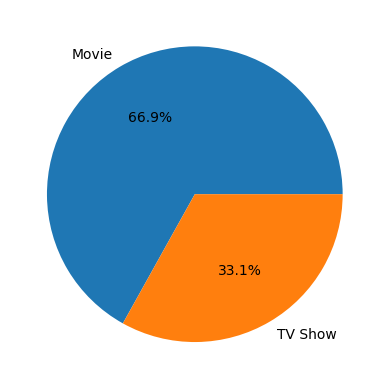

In [52]:
# pie_df    = input_data_df[['Media Type']]

# Count the number of occurrences of each category
counts = pie_df['Media Type'].value_counts()

# Create a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')

Analysis : About 2/3 content on Netflix is Movies and 1/3 are movies.

## Sheet 2. Movie & TV Show by Country

In [53]:
# Create a new DataFrame with two columns from the existing DataFrame
stacked_bar_df = input_data_df[['Media Type', 'Country Name']]

# Print the new DataFrame
stacked_bar_df.head()

,Media Type,Country Name
0,Movie,United States
1,TV Show,South Africa
2,TV Show,Not Given
3,TV Show,Not Given
4,TV Show,Not Given


In [54]:

# Filter out rows where the 'Category' column is 'B'
stacked_bar_df = stacked_bar_df[stacked_bar_df['Country Name'] != 'Not Given']

stacked_bar_df.head()

,Media Type,Country Name
0,Movie,United States
1,TV Show,South Africa
6,Movie,"United States, Ghana, Burkina Faso, United Kin..."
7,TV Show,United Kingdom
8,Movie,United States


In [55]:
# Count the number of rows in each category in the 'Category' column
counts_df = stacked_bar_df['Country Name'].value_counts()

# Select the top 10 categories by count of rows
top_10_categories_df = counts_df.head(10)

# Print the top 10 categories by count of rows
print(top_10_categories_df)

Country Name
United States     2812
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Turkey             105
Name: count, dtype: int64


In [56]:
# Convert the index to a column
top_10_categories_df = top_10_categories_df.reset_index()

# Convert the 'Category' column to a list of values
category_list = top_10_categories_df['Country Name'].tolist()

# Print the list of values
print(category_list)

['United States', 'United Kingdom', 'Japan', 'South Korea', 'Canada', 'Spain', 'France', 'Mexico', 'Egypt', 'Turkey']


In [57]:
# Filter rows in the 'Category' column only if the value is present in the list
stacked_bar_df = stacked_bar_df[stacked_bar_df['Country Name'].isin(category_list)]

# Print the filtered DataFrame
print(stacked_bar_df)

     Media Type    Country Name
0         Movie   United States
7       TV Show  United Kingdom
8         Movie   United States
14      TV Show   United States
16      TV Show          Mexico
...         ...             ...
7797      Movie   United States
7800    TV Show          Turkey
7803      Movie   United States
7805      Movie   United States
7806      Movie   United States

[4444 rows x 2 columns]


<Axes: xlabel='Country Name'>

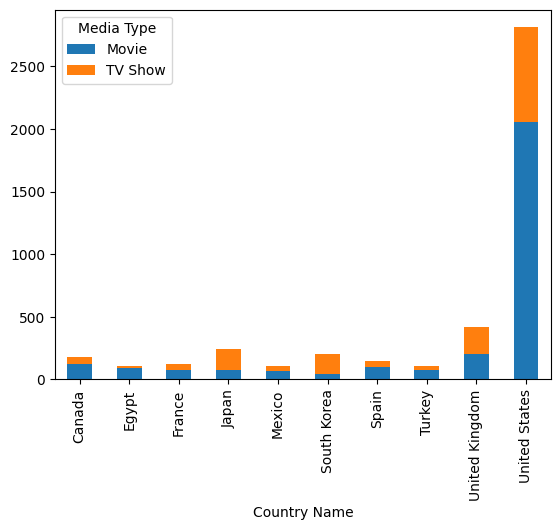

In [58]:

# default order of printing bars is alpahbetical order

stacked_bar_df.groupby(['Country Name', 'Media Type']).size().unstack().plot(kind='bar', stacked=True)

In [ ]:


# default order of printing bars is alpahbetical order

stacked_bar_df.groupby(['Country Name', 'Media Type']).size().unstack().plot(kind='barh', stacked=True)


<Axes: ylabel='Country Name'>

 Analysis: Most of the movies and TV shows are of english language from USA 🇺🇸 and UK🇬🇧 followed by east Asian countires such as Japan 🇯🇵 and South Korea 🇰🇷.
 Maybe we will never know what content is produced in Best Korea 🇰🇵.

## Sheet 3. Number of Contents Added through the Years

In [ ]:

#
content_added_in_years_df = input_data_df['Release Year']

# convert series to frame
content_added_in_years_df = content_added_in_years_df.to_frame()

content_added_in_years_df.head()

In [ ]:
content_added_in_years_df.columns

In [ ]:
# Count the number of occurrences of each category in the 'Category' column
category_counts = content_added_in_years_df['Release Year'].value_counts().sort_values(ascending=False)

# Print the category counts
print(category_counts)

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(20, 6))

# Create a line chart
category_counts.plot(kind='line')

# Add a title and labels for the axes
plt.title('Number of Contents Added through the Years')
plt.xlabel('Year')
plt.ylabel('Number of Moive and TV Show titles released that year')

# Display the chart
plt.show()

In [ ]:

category_counts_df = category_counts.to_frame()

category_counts_df = category_counts_df.reset_index()

category_counts_df.head()

#
# sns.lineplot(x='Release Year', y='Euro rate', data=category_counts)

In [ ]:

fig = plt.subplots(figsize=(15,7))
ax = sns.lineplot(data=category_counts_df, x="Release Year", y="count", marker = "o", markers=True, markevery=5).set(title='Number of Contents Added through the Years',
                                                                       xlabel='Year', ylabel='Numbers added')


# Add y-values at every marker

# Display the plot
plt.show()

## Sheet 4. Top Directors

## Sheet 5. Top Genres

## Sheet 8. Content Types over the Years

In [ ]:
content_types_over_the_years_df = input_data_df[['Media Type', 'Release Year', 'Date Added']].copy()

content_types_over_the_years_df['Date Added Year Only'] = content_types_over_the_years_df['Date Added'].dt.year


content_types_over_the_years_df.head()

In [ ]:

# Count the number of occurrences of each category in the 'Category' column
category_counts = content_types_over_the_years_df.value_counts(
                    subset=['Date Added Year Only', 'Media Type'])

# print
print(category_counts)

In [ ]:

# Create a new column that contains the value counts of 'Column1' for each unique value of 'Column2'
content_types_over_the_years_df['Count'] = content_types_over_the_years_df['Date Added Year Only'].map(content_types_over_the_years_df.groupby('Media Type')['Date Added Year Only'].value_counts())

content_types_over_the_years_df.head()

In [ ]:


# category

category_counts_df = category_counts.to_frame()

category_counts_df = category_counts_df.reset_index()

# print
category_counts_df





In [ ]:
# category_counts_df  = category_counts_df.set_index('Date Added Year Only')

category_counts_df.head()

In [ ]:
# df.pivot_table(index=['Country_1'], columns='Var_name', values='Year',aggfunc='first')

# df.pivot_table(index=['Media Type'], columns='Var_name', values='Year',aggfunc='first')


category_counts_movies_df = category_counts_df.loc[category_counts_df['Media Type'] == 'Movie']

category_counts_movies_df.head()


In [ ]:
#

category_counts_tv_show_df = category_counts_df.loc[category_counts_df['Media Type'] == 'TV Show']

category_counts_tv_show_df.head()

In [ ]:

# set style and set spines
sns.set_style("dark", {'axes.linewidth': 2, 'axes.edgecolor':'black'})
sns.lineplot(x='Date Added Year Only', y='count', data=category_counts_movies_df,
             label='Movies')
sns.lineplot(x='Date Added Year Only', y='count', data=category_counts_tv_show_df,
             label='TV Shows')

#ax.legend()

# plt.title("Content Types added over the Years")
# plt.show()

plt.title('Content Types added over the Years')
plt.xlabel('Year')
plt.ylabel('Count')

# Add a legend
plt.legend(loc='upper left')

# Add a grid
plt.grid(True)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

Analysis : Lot more movies have been added oveer the past 8 years since 2016 as shown in sharp upside curve in the chart

In [ ]:
raise SystemExit("Stop right there!")

# The End 🛑